In [ ]:
# !pip install lightgbm

In [2]:
import numpy  as np
import pandas as pd
import time
from datetime import datetime
import joblib
import os
from tabulate                      import tabulate
from sklearn.decomposition         import PCA
from sklearn.model_selection       import GridSearchCV
from sklearn.svm                   import SVC
from sklearn.svm                   import LinearSVC
from lightgbm                      import LGBMClassifier
from sklearn.preprocessing         import StandardScaler
from sklearn.model_selection       import train_test_split
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.dummy                 import DummyClassifier
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.linear_model          import LogisticRegression
from sklearn.ensemble              import HistGradientBoostingClassifier
from sklearn.ensemble              import GradientBoostingClassifier
from sklearn.ensemble              import BaggingClassifier 
from sklearn.ensemble              import ExtraTreesClassifier
from sklearn.ensemble              import ExtraTreesRegressor
from sklearn.model_selection       import cross_validate
from sklearn.model_selection       import cross_val_score
from sklearn.metrics               import f1_score
from sklearn.metrics               import r2_score
from sklearn.metrics               import confusion_matrix
from sklearn.metrics               import classification_report
from sklearn.metrics               import recall_score
from sklearn.metrics               import fbeta_score
from sklearn.metrics               import precision_score
from sklearn.metrics               import roc_auc_score
from sklearn.feature_selection     import f_regression
from sklearn.ensemble              import RandomForestClassifier
import json
from matplotlib import pyplot as plt
import seaborn as sns

rep_src   = "../data/raw/"       # Fichiers téléchargés avant traitements
rep_inter = "../data/inter/"     # Des fichiers intermédiaires sont utilisés
rep_dst   = "../data/processed/" # Fichiers utilsés par la modélisation



# Quelques auxiliaires 
## printlog()
Cette fonction affiche les messages à l'écran et les ajoute à une chaîne de caractères nomée logres. Elle permet d'enregistrer les message dans un fichier avec les résultats d'entraînement.
## format_duree()
Cette fonction convertit une durée en une chaîne de caractères contenant heures, minutes et secondes.

In [4]:
logres = ""
def printlog(msg=""):
    global logres
    logres += f"{msg}\n"
    print (msg)
    return
    
def format_duree(seconds_f):
    # Conversion en heures, minutes et secondes
    seconds = int(seconds_f)
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    secs = seconds % 60
    
    # Formatage conditionnel en fonction de la durée
    if hours > 0:
        return f"{hours} h {minutes}min"
    elif minutes > 0:
        return f"{minutes} min {secs} s"
    else:
        return f"{secs} s"


# Lecture du jeu de données et séparation des variables explicatives et cibles
Cette cellule lit le jeu de données et sépare les variables explicatives et la variable cible. De plus, lors du développement et de la mise au point de la cellule d'entraînement elle réalise un sous-échantillonage avec df.sample() pour réduire les temps d'entraînement. Il est ainsi possible de faire un modification de code et d'en voir le résultat après quelques minutes au lieu de d'une heure. Nous constatons que un sous-échantillonage à seulement 5000 observations réduit "modérément" les scores.

In [6]:
# Lecture du jeu de données
df = pd.read_csv(rep_dst + '/' + "data.csv", sep = '\t', index_col = None)

# Pour essais préalables et mise au point
# Avec 5000, voire 2500 observation le temps d'entraînement est très faible,
# de l'ordre de deux minutes.
# df = df.sample(25000)

# et séparation des variables explicatives et de la variable cible

X = df.drop(['grav_grave'], axis = 1)
feature_names = X.columns

y= df.grav_grave




# Réduction de dimension avec la PCA
Le jeu de données contient environ 260 variables explicatives, ce nombre est très important, nous décidons alors d'appliquer une PCA. 
Après avoir appliqué la PCA nous normalisons le jeu de données de dimension réduite.
Deux graphiques nous aident à choisir le nombre de composantes en affichant la variance expliquée par composante.
Avec seulement 5 composantes les performances sont peu affectées. Nous choisissons cependant 20 composantes afin de ne pas risquer de diminuer les performances des modèles. Il conviendrait d'essayer ultérieurement des nombres de composantes plus faibles pour le modèle retennu en surveillant la métrique.

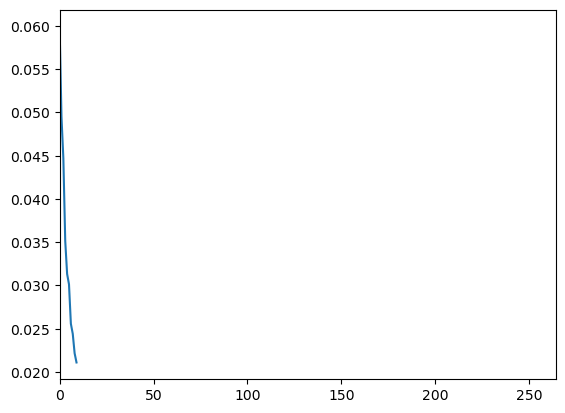

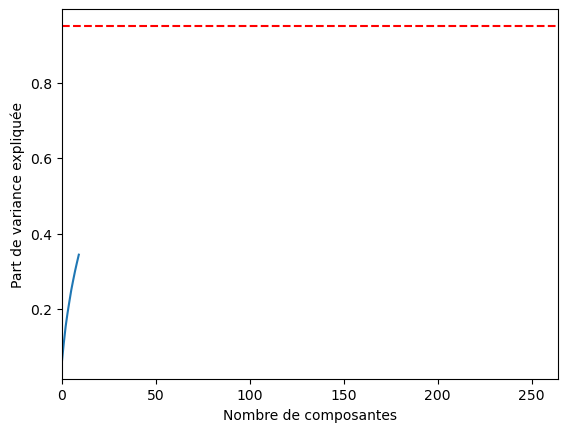

In [8]:

# Réduction de dimension
pca = PCA(n_components = 10)
pca.fit(X)

plt.figure()
plt.xlim(0,X.shape[1])
plt.plot(pca.explained_variance_ratio_);

plt.figure()
plt.xlim(0,X.shape[1])
plt.xlabel('Nombre de composantes')
plt.ylabel('Part de variance expliquée')
plt.axhline(y = 0.95, color ='r', linestyle = '--')
plt.plot(pca.explained_variance_ratio_.cumsum());

X = pca.transform(X)

# standardisation
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
#print (pca.explained_variance_)
#print (pca.components_)
print ()
print (X.shape)



(177642, 10)


In [10]:
# Séparation du jeu de données d'entraînement et de tests
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .20, random_state = 1234)

In [11]:
# Lecture du fichier de description des variables
# et constitution de la liste des libellées étendus
# with open('desc_vars_model.json', 'r') as f:
#     desc_vars = json.load(f)

# feature_full_names = []
# for name in feature_names:
#     try:
#         libelle = desc_vars[name]["label"]
#     except :
#         libelle = name
#     feature_full_names.append (libelle)


# Essais et entraînement de modèles
Nous entraînons les modèles que nous avons découverts lors des cours et de modèles supplémentaires proposés par lazypredict avec pour certains plusieurs hyper paramètres.
## Modèles essayés
### LR : Logistic Regression
### Hist Gradient Boosting
### ...
## Utilisation de GridSearchCV
Nous utilisons GridSearch CV pour entrîner le modèles et, pour certains, trouver les meilleurs paramètres. 
## Critères de choix du modèle et métriques utilisées
Nous décidons de chercher les circonstances qui... TODO à préciser. Avant d'arréter ce choix nous avons affiché plusieurs métriques d'évaluation des modèles.
### Métriques essayées / affichées
Nous essayons les métriques suivantes :
- Scores sur le jeu d'entraînement et le jeu de test ;
- f1 ;
- AUC ;
- Précision ;
- Rappel ;
- FBéta, avec Béta = 2 ;
- R2
    
### Métrique retenue
Finalement nous choisissons ___ TODO à décider

## Choix de codage
Codage permettant des modif très faciles et rapides
Affichages détaillés pour le contrôle, la mise au point, les essais et la compréhension des principes sous-jacents des modèles et de leurs performances
Utilisation d'un dictionnaire pour la liste des modèles
Utilisation d'un DataFrame pour stocker les scores et performances des modèles
Affichages synthétiques et essentiels possibles dans les cellules suivantes avec le tableau de résulats
Affichage et enregistrement dans un fichier des résultats pour exploitation ultérieure et comparaisons



In [13]:
modeles = {
    
"SVC" : {
    "prmsgscv" : {"gamma" : ["scale", "auto"]
                  #"kernel" : ["linear", 'poly', 'rbf', 'sigmoid', 'precomputed'],
                  },
    "prmfixes" : {},
    "pred"     : None,
    "perf"     : [],
    "nom"      : "SVC",
    "libelle"  : "Classification à support de vecteurs",
    "classe"   : "sklearn.svm.SVC",
    "instance" : SVC(),
    "grid"     : None
},
    
"LR" : {
    "prmsgscv" : {'solver' : ['liblinear', 'lbfgs'],
                 # 'C'      : [10**(i) for i in range(-4, 3)]},
                  'C'      : [0.003, 0.005, 0.01, 0.02, 0.04]},
    "prmfixes" : {},
    "perf"     : {},
    "nom"      : "LogisticRegression",
    "libelle"  : "Régression logistique",
    "classe"   : "sklearn.xxx",
    "instance" : LogisticRegression(max_iter = 10000),
    "grid"     : None
},

"HGB" : {
    "prmsgscv" : {#"min_samples_leaf" : [3, 4, 5, 7, 10, 14, 20, 28]
                 "max_leaf_nodes" : [None, 15, 31, 63 ],
                 "l2_regularization" : [0.001, 0.01, 0.1, 1, 10],
                 
                 },
    "prmfixes" : {},
    "perf"     : {},
    "nom"      : "HistGradientBoostingClassifier",
    "libelle"  : "Hist Gradient Boosting Classifier",
    "classe"   : "sklearn.neighbors.HistGradientBoostingClassifier",
    "instance" : HistGradientBoostingClassifier(random_state = 421),
    "grid"     : None
},

"LGBM" : {
    "prmsgscv" : { # rf provoque des erreurs
                  "boosting_type" : ["gbdt", "dart", "goss"],
                  #"num_leaves"    : [15,31,63],
                  #"learning_rate" : [0.05, 0.1, 0.2],
                  #"n_estimators"  : [50, 100, 200]
                 },
    "prmfixes" : {},
    "perf"     : {},
    "nom"      : "LGBMClassifier",
    "libelle"  : "LGBMClassifier",
    "classe"   : "sklearn.",
    "instance" : LGBMClassifier(verbosity=-1, random_state = 421),
    "grid"     : None
},

"DT" : {
    "prmsgscv" : {"criterion" : ["gini", "entropy", "log_loss"],
                  "splitter" : ["best", "random"]},
                  
    "prmfixes" : {},
    "perf"     : {},
    "nom"      : "DecisionTreeClassifier",
    "libelle"  : "Arbre de décision",
    "classe"   : "sklearn.tree.DecisionTreeClassifier",
    "instance" : DecisionTreeClassifier(random_state = 123), 
    "grid"     : None
},

"ET" : {
    "prmsgscv" : {},
    "prmfixes" : {},
    "perf"     : {},
    "nom"      : "ExtraTreesClassifier",
    "libelle"  : "Extra Trees Classifier",
    "classe"   : "sklearn.ensemble.ExtraTreesClassifier",
    "instance" : ExtraTreesClassifier(),
    "grid"     : None
},

"BAG" : {
    "prmsgscv" : {},
    "prmfixes" : {},
    "perf"     : {},
    "nom"      : "BaggingClassifier",
    "libelle"  : "Bagging Classifier",
    "classe"   : "sklearn.neighbors.BaggingClassifier",
    "instance" : BaggingClassifier(),
    "grid"     : None
},

"KNN" : {
    "prmsgscv" : {#"n_neighbors" : [2, 3, 5, 8, 10, 12, 15],
                  "metric" : ['minkowski', 'manhattan', 'chebyshev']},
    "prmfixes" : {},
    "perf"     : {},
    "nom"      : "KNeighborsClassifier",
    "libelle"  : "Plus proches voisins",
    "classe"   : "sklearn.neighbors.KNeighborsClassifier",
    "instance" : KNeighborsClassifier(),
    "grid"     : None
},

"RF" : {
    "prmsgscv" : {#"n_estimators" : [50,100,200],
                  #"max_depth" : [3,5,10,20,40]
                 },
    "prmfixes" : {},
    "perf"     : {},
    "nom"      : "RandomForestClassifier",
    "libelle"  : "Forêt aléatoire",
    "classe"   : "sklearn.neighbors.RandomForestClassifier",
    "instance" : RandomForestClassifier(random_state =421), 
    "grid"     : None
},

"GB" : {
    "prmsgscv" : {"loss" : ["log_loss", "exponential"],
                  #"n_estimators" : [200, 400],
                  "criterion" : ["friedman_mse", "squared_error"],
                  #"min_samples_leaf" : [1,2,4],
                  #"max_features" : [1, 2, 4, 8, 16, 32, 64 , 128]
                  #"max_features" : [ 4, 6, 8, 12, 16, 20, 32 ]
                 },
    "prmfixes" : {},
    "perf"     : {},
    "nom"      : "GradientBoostingClassifier",
    "libelle"  : "Gradient Boosting Classifier",
    "classe"   : "sklearn.neighbors.GradientBoostingClassifier",
    "instance" : GradientBoostingClassifier(random_state = 421),
    "grid"     : None
},

# Je n'ai pu m'en empêcher, j'ai mis le classificateur bidon
# Je l'ai fait pour voir et le comparer aux autres modèles.
"BIDON" : {
    "prmsgscv" : {},
    "prmfixes" : {},
    "perf"     : {},
    "nom"      : "DummyClassifier",
    "libelle"  : "Dummy Classifier",
    "classe"   : "sklearn.dummy.DummyClassifier",
    "instance" : DummyClassifier(random_state = 421, strategy = "uniform"),
    "grid"     : None
}

}

###########################################################################
# Initialisations : variables, comptes-rendus, tables...
###########################################################################

# Tableau des performances
tbl_perf = pd.DataFrame({"Modele":[], "libelle":[],
                         "duree_GSCV": [],"duree_GSCV_str": [],
                         "score_ent" : [],"score_test":[],
                         "score_f1_0":[], "score_f1_1":[],
                         "score_auc":[],
                         "score_precision":[],
                         "score_recall_0":[], "score_recall_1":[],
                         "score_fbeta_b2":[],
                          # Nbres vrais/faux positifs/négatifs et pourcentages
                         "tn":[], "tnpc":[], "fp":[], "fppc":[],
                         "fn":[], "fnpc":[], "tp":[], "tppc":[],
                         "taille_mdl":[] # Taille du modèle à enregistrer (octets)
                         })
tbl_perf.set_index("Modele")

# logres est une chaîne de caractères contenant les messages destinés
# à l'affichage sur le notebook et l'enregistrement dans un fichier texte.
logres = "" # Effacement des messages, en cas de ré-exécution de la cellule
printlog(datetime.now())

nb_tot = int(X_test.shape[0] + X_train.shape[0])  # Nbre total d'observations
nb_ent = int(X_train.shape[0])                    # Nbre d'observations pour les entrainements
nb_test = int(X_test.shape[0])                    # Nbre d'observations pour les tests

nb_tot_true = int(y_test.sum() + y_train.sum())   # Nbre total d'observation 'graves'
nb_ent_true = int(y_train.sum())                  # Nbre d'observation 'graves' pour les entrainements
nb_test_true = int(y_test.sum())                  # Nbre d'observation 'graves' pour les tests

nb_tot_false  = nb_tot  - nb_tot_true             # Nbre total d'observation 'non graves'
nb_ent_false  = nb_ent  - nb_ent_true             # Nbre d'observation 'non graves' pour les entrainements
nb_test_false = nb_test - nb_test_true            # Nbre d'observation 'non graves' pour les tests

#
# Affichages de nombre d'observations et modalités de la cible.
# Cet affichage sert principalement à la mise au point du notebook.
#
printlog (f" Tailles           | Total  |  graves (True)   | Non graves (False)")
printlog (f"                   |        | nombre | prop    | nombre |  prop")          
printlog (f"Jeu d'entraînement | {nb_ent:6d} | {nb_ent_true:6d} | {100.*nb_ent_true/nb_ent:6.2f}% | {nb_ent_false:6d} | {100.*nb_ent_false/nb_ent:6.2f}%")
printlog (f"Jeu de test        | {nb_test:6d} | {nb_test_true:6d} | {100.*nb_test_true/nb_test:6.2f}% | {nb_test_false:6d} | {100.*nb_test_false/nb_test:6.2f}%")
printlog (f"Total              | {nb_tot:6d} | {nb_tot_true:6d} | {100.*nb_tot_true/nb_tot:6.2f}% | {nb_tot_false:6d} | {100.*nb_tot_false/nb_tot:6.2f}%")
printlog ()
printlog (f"Nombre de variables explicatives (après PCA) : {X_train.shape[1]:6d}")

ttot1 = time.time()
idx_modele=1 # Numéro du modèle en cours, pour l'affichage uniquement

###########################################################################
# Boucle pour chaque modèle
###########################################################################

for k, m in modeles.items():
    perf = {}
    printlog ()
    printlog (f"-----  {m['libelle']:20s}  [{idx_modele:2d}/{len(modeles):2d}]  -----")
    printlog ("")
    idx_modele += 1
    model = m["instance"]
    params = m["prmsgscv"]
    printlog (f"Paramètres essayés : ")
    for prm, val in params.items():
        printlog (f"     {prm:15s} : {val}")
    printlog ()
    printlog (model)

    ###########################################################################
    # Essais avec GridSearchCV et rech., le cas échéant, meilleurs paramètres
    ###########################################################################

    printlog ("Entraînement avec GridSearchCV : Recherche des meilleurs paramètres")

    t1 = time.time()

    # TODO : mettre la métrique retenue pour la sélection du meilleur modèle
    grille_clf = GridSearchCV(model, param_grid = params, cv = 5, n_jobs = -1)
    grille = grille_clf.fit (X_train, y_train)

    t2 = time.time()

    printlog ()
    printlog ("Paramètres retenus :")
    for it in grille.best_params_.items():
        printlog (f"  {it[0]:20s} : {it[1]}")
    printlog ()

    # Récupération du (meilleur) modèle
    model = grille_clf.best_estimator_

    ###########################################################################
    # Prédiction avec le modèle sélectionné
    ###########################################################################

    printlog ("Prédiction :")
    y_pred = model.predict (X_test)
    t = time.time()
    
    ###########################################################################
    # Calculs des scores, métriques et autres valeurs
    ###########################################################################

    # Le temps d'entraînement d'un modèle avec les meilleurs paramètres n'est
    # pas connu. Le temps retennu est le temps d'entraînement d'un modèle
    # ou de plusieurs modèles avec paramètres différents.
    # Il est toutefois affiché pour information.
    duree_GSCV = grille_clf.refit_time_       # temps d'entraînement du meilleur modèle
    duree_GSCV_str = format_duree(duree_GSCV) # le même plus lisible : h m s
    score_ent = model.score(X_train, y_train)
    score_test = model.score(X_test,  y_test)
    score_f1_0, score_f1_1 = f1_score(y_test, y_pred, average = None)
    score_auc = roc_auc_score(y_test, y_pred, average = None)
    score_precision = precision_score(y_test, y_pred, average = 'macro')
    score_recall_0, score_recall_1 = recall_score(y_test, y_pred, average = None)
    score_fbeta_b2 = fbeta_score(y_test, y_pred, beta = 2)

    printlog (f"Durée                           : {duree_GSCV_str}")
    printlog (f"Score sur le jeu d'entraînement : {score_ent:7.4f}%")
    printlog (f"Score sur le jeu de test        : {score_test:7.4f}")
    printlog (f"Scores f1                       : {score_f1_0:7.4f}  {score_f1_1:7.4f}")
    
    printlog (classification_report(y_test, y_pred))
    # printlog ()
    # printlog (f"Score R2                         : {r2_score(y_test, y_pred):7.4f}")
    printlog ()

    try:
        fimp = model.feature_importances_
        classement_var = pd.DataFrame(data={"Variable" : feature_names, "description" : feature_full_names, "Importance" : model.feature_importances_})
        classement_var = classement_var.sort_values (by = "Importance", ascending = False)
        printlog (f"Importance des variables :")
        printlog (classement_var.to_string())

    except AttributeError:
        printlog ("Pas de feature_importances_")
    except Exception:
        printlog ("feature importances non utilisable")
        
    printlog ()
    printlog ("Matrice de confusion :")
    ctab = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
    cm = confusion_matrix(y_test, y_pred)
    printlog (ctab)
    tn, fp, fn, tp = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
    printlog (confusion_matrix(y_test, y_pred, normalize = "all")*100.)
    printlog ()
    nom_fic_mdl = m["nom"]+".mdl"
    joblib.dump(model, nom_fic_mdl)
    taille_mdl = os.path.getsize(nom_fic_mdl)
    printlog (f"Enregistrement du modèle entraîné : {nom_fic_mdl} , {taille_mdl}octets, {int(os.path.getsize(nom_fic_mdl)/(1024*1024))}Mo")

    ###########################################################################
    # Stockage des performances dans le DataFrame tbl_perf
    ###########################################################################

    perf_modele = pd.DataFrame([{"Modele":k, "libelle":m["libelle"],
                         "duree_GSCV": duree_GSCV,"duree_GSCV_str": duree_GSCV_str,
                         "score_ent" : score_ent,"score_test":score_test,
                         "score_f1_0":score_f1_0, "score_f1_1":score_f1_1,
                         "score_auc":score_auc,
                         "score_precision":score_precision,
                         "score_recall_0":score_recall_0, "score_recall_1":score_recall_1,
                         "score_fbeta_b2":score_fbeta_b2,
                         "tn" : tn, "tnpc" : 100 * tn / nb_test,
                         "fp" : fp, "fppc" : 100 * fp / nb_test,
                         "fn" : fn, "fnpc" : 100 * fn / nb_test,
                         "tp" : tp, "tppc" : 100 * tp / nb_test,
                         "taille_mdl":taille_mdl
                         }])

    # Ajouter la nouvelle ligne avec concat
    tbl_perf = pd.concat([tbl_perf, perf_modele], ignore_index=True)


ttot2 = time.time()
printlog()
printlog()
printlog(str(tbl_perf))
printlog()
printlog()
printlog (f"Temps total {int(ttot2-ttot1)//60} min {int(ttot2-ttot1)%60} s.")
printlog()
printlog(datetime.now())
with  open("entrainement.txt", "wt") as file:
    file.write (logres)
    

2024-10-11 10:11:48.999743
 Tailles           | Total  |  graves (True)   | Non graves (False)
                   |        | nombre | prop    | nombre |  prop
Jeu d'entraînement | 142113 |  71012 |  49.97% |  71101 |  50.03%
Jeu de test        |  35529 |  17809 |  50.13% |  17720 |  49.87%
Total              | 177642 |  88821 |  50.00% |  88821 |  50.00%

Nombre de variables explicatives (après PCA) :     10

-----  Classification à support de vecteurs  [ 1/11]  -----

Paramètres essayés : 
     gamma           : ['scale', 'auto']

SVC()
Entraînement avec GridSearchCV : Recherche des meilleurs paramètres

Paramètres retenus :
  gamma                : scale

Prédiction :
Durée                           : 23 min 41 s
Score sur le jeu d'entraînement :  0.7486%
Score sur le jeu de test        :  0.7430
Scores f1                       :  0.7284   0.7560
              precision    recall  f1-score   support

       False       0.77      0.69      0.73     17720
        True       0.72      0

# Affichage du tableau de performances


In [15]:
tblp = tbl_perf[['libelle', 'tn', 'fp', 'fn', 'tp']]
#tblp["total"] = tblp.tn + tblp.fp + tblp.fn + tblp.tp
#tblp["tnpc"] = 100. * tblp["tn"] / tblp["total"] 
#tblp["fppc"] = 100. * tblp["fp"] / tblp["total"]
#tblp["fnpc"] = 100. * tblp["fn"] / tblp["total"]
#tblp["tppc"] = 100. * tblp["tp"] / tblp["total"]

#tblp = tblp[['libelle', 'tn', 'tnpc', 'fp', 'fppc', 'fn', 'fnpc', 'tp', 'tppc']]
#tblp['libelle']
type(tblp)

#print (tblp.columns )
#tp = pd.concat([tp, tbl_perf.tn], axis  = 1)

#print  (tabulate(tblp), )
print (nb_test)


35529


In [16]:

print (tabulate (tbl_perf[['libelle', 'score_ent', 'score_test', 'score_f1_0', 'score_f1_1', 'score_auc']],
       headers = ["libellé", "Entraînement", "Test", "f1 0", "f1 1 ", "AUC"  ]))
print()
print()
print (tabulate (tbl_perf[['libelle', 'score_precision', 'score_recall_0', 'score_recall_1', 'score_fbeta_b2']],
       headers = ["libellé", "Précision", "Recall 0", "Recall 1", "f béta=2"]))
print()
print()
print (tabulate (tbl_perf[['libelle', 'tn', 'tnpc', 'fp', 'fppc', 'fn', 'fnpc', 'tp', 'tppc']],
       headers = ['libellé', 'Vrais nég.', '%', 'Faux pos.', '%', 'Faux nég.', '%', 'Vrais pos.', '%']))
print()
print()
print (tabulate (tbl_perf[['libelle',  'duree_GSCV', 'duree_GSCV_str', 'taille_mdl']],
       headers = ["libellé", "Duré entraînement", "Id.", "Taille modèle"]))


    libellé                                 Entraînement      Test      f1 0     f1 1        AUC
--  ------------------------------------  --------------  --------  --------  --------  --------
 0  Classification à support de vecteurs        0.748573  0.742971  0.728441  0.756025  0.742841
 1  Régression logistique                       0.713869  0.715162  0.714544  0.715778  0.715161
 2  Hist Gradient Boosting Classifier           0.760613  0.740972  0.729379  0.751613  0.74087
 3  LGBMClassifier                              0.750762  0.738664  0.725564  0.750571  0.738549
 4  Arbre de décision                           0.999683  0.659152  0.660556  0.657736  0.659166
 5  Extra Trees Classifier                      0.999683  0.740691  0.733982  0.747069  0.740632
 6  Bagging Classifier                          0.985188  0.713755  0.72201   0.704995  0.713834
 7  Plus proches voisins                        0.803544  0.716147  0.711915  0.720257  0.716115
 8  Forêt aléatoire            

In [17]:
#(lambda: DeepnoteChart(tbl_perf, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false,"title":"Modèle"},"sort":null,"type":"nominal","field":"libelle","scale":{"type":"linear"}},"y":{"axis":{"grid":false,"title":"Nombre"},"sort":null,"type":"quantitative","field":"fn","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"}}}]}],"title":"Nombre de faux négatifs par modèle","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(tbl_perf, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false,"title":"Modèle"},"sort":null,"type":"nominal","field":"libelle","scale":{"type":"linear"}},"y":{"axis":{"grid":false,"title":"Nombre"},"sort":null,"type":"quantitative","field":"fn","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"}}}]}],"title":"Nombre de faux négatifs par modèle","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}"""))()

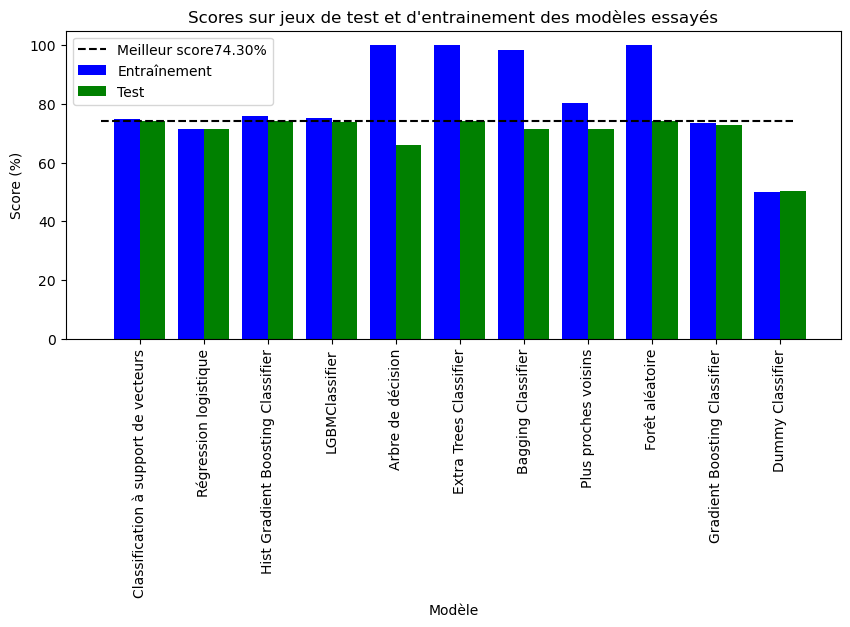

In [18]:
fig = plt.figure(figsize = (10, 4))

bar_width = 0.4
x_indexes = np.arange(tbl_perf.shape[0])
x_indexes_z = x_indexes + bar_width  # Décalage pour les barres de z

plt.bar(x_indexes, tbl_perf["score_ent"]*100., width=bar_width, color='blue', label='Entraînement')
plt.bar(x_indexes_z, tbl_perf["score_test"]*100., width=bar_width, color='green', label='Test')
meilleur_score = tbl_perf["score_test"].max()*100
plt.hlines(meilleur_score, x_indexes[0] - bar_width, x_indexes[-1] + bar_width,
           color='black', linestyles='dashed', label =f"Meilleur score{meilleur_score:3.2f}%")

plt.title("Scores sur jeux de test et d'entrainement des modèles essayés")
plt.xlabel("Modèle")
plt.ylabel("Score (%)")
plt.xticks(x_indexes + bar_width / 2, tbl_perf["libelle"], rotation = 90)
plt.legend()

plt.show()

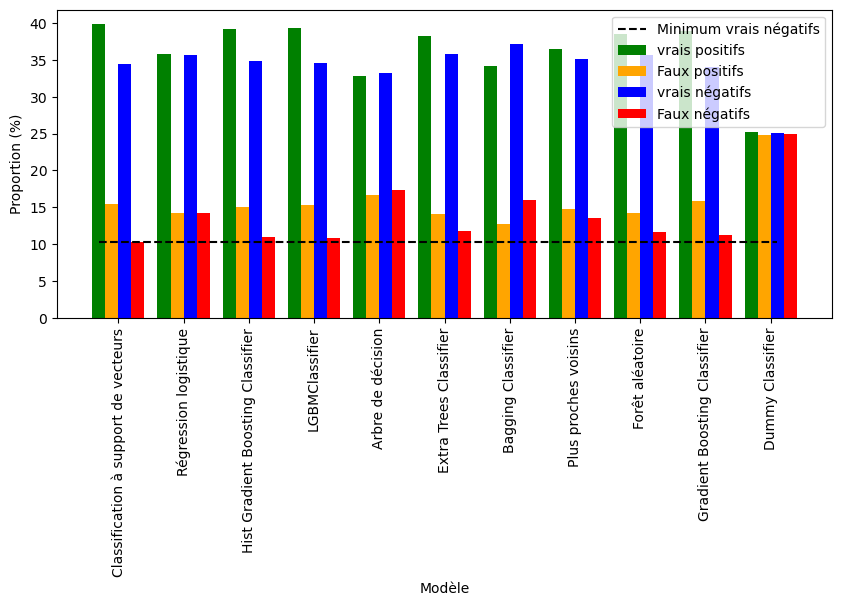

In [19]:
fig = plt.figure(figsize = (10, 4))

bar_width = 0.2
x1 = np.arange(tbl_perf.shape[0]) - bar_width
x2 = x1 + 1 * bar_width
x3 = x1 + 2 * bar_width
x4 = x1 + 3 * bar_width

plt.bar(x1, 100.*tbl_perf["tp"]/nb_test, width=bar_width,  color='green', label='vrais positifs')
plt.bar(x2, 100.*tbl_perf["fp"]/nb_test, width=bar_width, color='orange', label='Faux positifs')
plt.bar(x3, 100.*tbl_perf["tn"]/nb_test, width=bar_width, color='blue', label='vrais négatifs')
plt.bar(x4, 100.*tbl_perf["fn"]/nb_test, width=bar_width, color='red', label='Faux négatifs')

min_fn = 100.*tbl_perf.loc[tbl_perf["libelle"] != "Dummy Classifier", "fn"].min()/nb_test
plt.hlines(min_fn, x_indexes[0] - bar_width, x_indexes[-1] + bar_width,
           color='black', linestyles='dashed', label="Minimum vrais négatifs")
plt.title("")
plt.xlabel("Modèle")
plt.ylabel("Proportion (%)")
plt.xticks(x_indexes + bar_width / 2, tbl_perf["libelle"], rotation = 90)
plt.legend()

plt.show()

# Reste à faire : TODOs
Ce notebook a été modifié pour 
  - intégrer de nouvelles métriques et les afficher dans des tableaux et graphiques;
  - inclure des textes d'explications, ces textes pourront servir à la rédaction de rapports;
Le notebook est encore en cours de développement, il doit être amélioré.

## affichage du score r2
Il provoque une erreur; je l'ai neutralisé ; il faudait l'afficher.

## Enregistrement des performances
Le tableau des performances doit être intégré vers la fin du fichier de rapport; ce tableau est trop large et doit être scindé en plusieurs tableaux. La fonction tabulate permettra un bon affichage des tableaux.

## Imports
Dans la cellule des imports il faut supprimer les objets ou fonctions inutiles.

## Textes d'explications
Ils sont à compléter.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=48c63c24-f1df-45c2-8e80-c8ef2e09cf67' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>